# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
#On importe les données dans un dataframe
df_biens = pd.read_excel("biens.xlsx")
df_histo = pd.read_excel("histo.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_biens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [4]:
df_histo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [5]:
df_histo['type_local'].unique()

array(['Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

In [6]:
df_histo["code_type_local"].unique()

array([2, 4], dtype=int64)

On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 et 4. 

### 3. Nombre de transactions

In [7]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est {}'.format(df_histo.shape[0]))
print('le nombre de transactions pour les appartements dans les données est '+str(np.shape(df_histo.loc[df_histo['code_type_local']==2])[0]))
print('le nombre de transactions pour les locaux commerciaux dans les données est ' + str(np.shape(df_histo.loc[df_histo['code_type_local']==4])[0]))

le nombre de transactions dans les données est 26196
le nombre de transactions pour les appartements dans les données est 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [8]:
#On vérifie également la plage de l'historique disponible
print('la première date de transaction dans les données est le ' +str(df_histo['date_mutation'].min()))
print('la dernière date de transaction dans les données est le ' +str(df_histo['date_mutation'].max()))

la première date de transaction dans les données est le 2017-01-02 00:00:00
la dernière date de transaction dans les données est le 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [9]:
# Calcul de la colonne
df_histo['prix_metre_carre']=df_histo['valeur_fonciere']/df_histo['surface_reelle']
df_histo

date_mutation  valeur_fonciere  adresse_numero  \
0        2017-01-03     5.505597e+05               8   
1        2017-01-12     1.576492e+06              32   
2        2017-01-10     6.577574e+05              52   
3        2017-01-10     2.500868e+05              64   
4        2017-01-13     1.762667e+05              25   
...             ...              ...             ...   
26191    2021-02-25     4.712239e+05              16   
26192    2021-02-17     1.982330e+06              23   
26193    2021-03-08     3.124359e+05               5   
26194    2021-03-11     1.562234e+05              15   
26195    2021-03-19     3.694294e+05             190   

                     adresse_nom_voie  code_postal               nom_commune  \
0      RUE DES COUTURES SAINT GERVAIS        75003   Paris 3e Arrondissement   
1                          AV MARCEAU        75008   Paris 8e Arrondissement   
2        RUE DU FAUBOURG SAINT HONORE        75008   Paris 8e Arrondissement   
3                     RUE DU VERTBOIS        75003   Paris 3e Arrondissement   
4      RUE DES LAVANDIERES STE OPPORT        75001  Paris 1er Arrondissement   
...                               ...          ...                       ...   
26191            RUE DU BOURG TIBOURG        75004   Paris 4e Arrondissement   
26192                  RUE DU SENTIER        75002   Paris 2e Arrondissement   
26193               RUE SAINT-SAUVEUR        75002   Paris 2e Arrondissement   
26194                     RUE BLONDEL        75002   Paris 2e Arrondissement   
26195                 RUE SAINT-DENIS        75002   Paris 2e Arrondissement   

       code_type_local                                type_local  \
0                    2                               Appartement   
1                    2                               Appartement   
2                    2                               Appartement   
3                    2                               Appartement   
4                    2                               Appartement   
...                ...                                       ...   
26191                2                               Appartement   
26192                4  Local industriel. commercial ou assimilé   
26193                2                               Appartement   
26194                2                               Appartement   
26195                2                               Appartement   

       surface_reelle  prix_metre_carre  
0                  50      11011.193562  
1                 163       9671.732877  
2                  66       9966.020548  
3                  22      11367.582877  
4                  15      11751.113836  
...               ...               ...  
26191              37      12735.781918  
26192             150      13215.536370  
26193              26      12016.765753  
26194              13      12017.182877  
26195              32      11544.667808  

[26196 rows x 10 columns]

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [10]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_histo_appartement=df_histo.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[df_histo['code_type_local']==2]
df_histo_appartement.head(5)

date_mutation  valeur_fonciere  code_postal   type_local  surface_reelle  \
0    2017-01-03     5.505597e+05        75003  Appartement              50   
1    2017-01-12     1.576492e+06        75008  Appartement             163   
2    2017-01-10     6.577574e+05        75008  Appartement              66   
3    2017-01-10     2.500868e+05        75003  Appartement              22   
4    2017-01-13     1.762667e+05        75001  Appartement              15   

   prix_metre_carre  
0      11011.193562  
1       9671.732877  
2       9966.020548  
3      11367.582877  
4      11751.113836

In [11]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
prix_moyen=df_histo_appartement[['date_mutation','prix_metre_carre']].groupby(df_histo_appartement.date_mutation.dt.year).mean()
prix_moyen

prix_metre_carre
date_mutation                  
2017                9492.859195
2018               10031.403432
2019               10562.712581
2020               10674.872650
2021               10455.600126

On constate sur la moyenne des prix de vente des appartements à Paris que de 2017 à 2020 la moyenne ne fait qu'augmenter. On note une légère baisse en 2021 <br>
Nous allons créer un graphique pour mieux le visualiser.

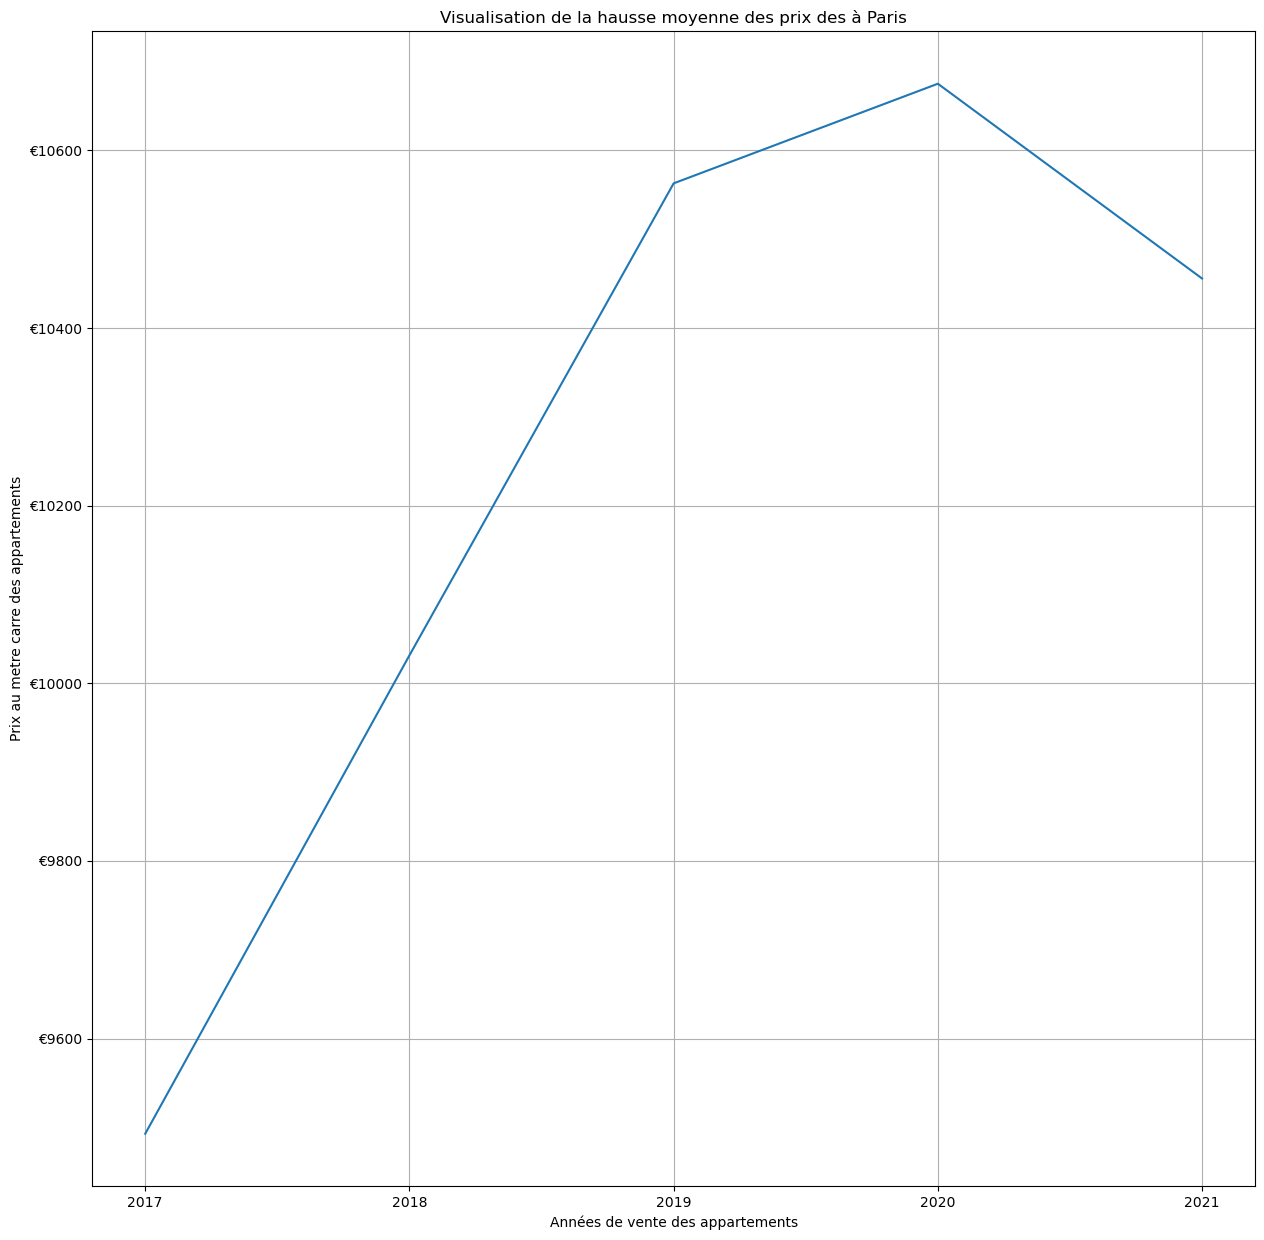

In [12]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'], prix_moyen['prix_metre_carre'])
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [13]:
#Liste des codes postaux dans nos données.

np.unique(df_histo_appartement['code_postal'])

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020], dtype=int64)

In [14]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
arrond=df_histo_appartement[['date_mutation','prix_metre_carre','code_postal']].groupby([df_histo_appartement.date_mutation.dt.year,'code_postal'],as_index=False).mean()
arrond

code_postal  prix_metre_carre
0         75001      11762.706289
1         75002      10920.126562
2         75003      11679.818729
3         75004      12407.227522
4         75005      11306.752404
..          ...               ...
95        75016      10790.307817
96        75017      10372.368746
97        75018       9665.640629
98        75019       8828.586057
99        75020       9114.398249

[100 rows x 2 columns]

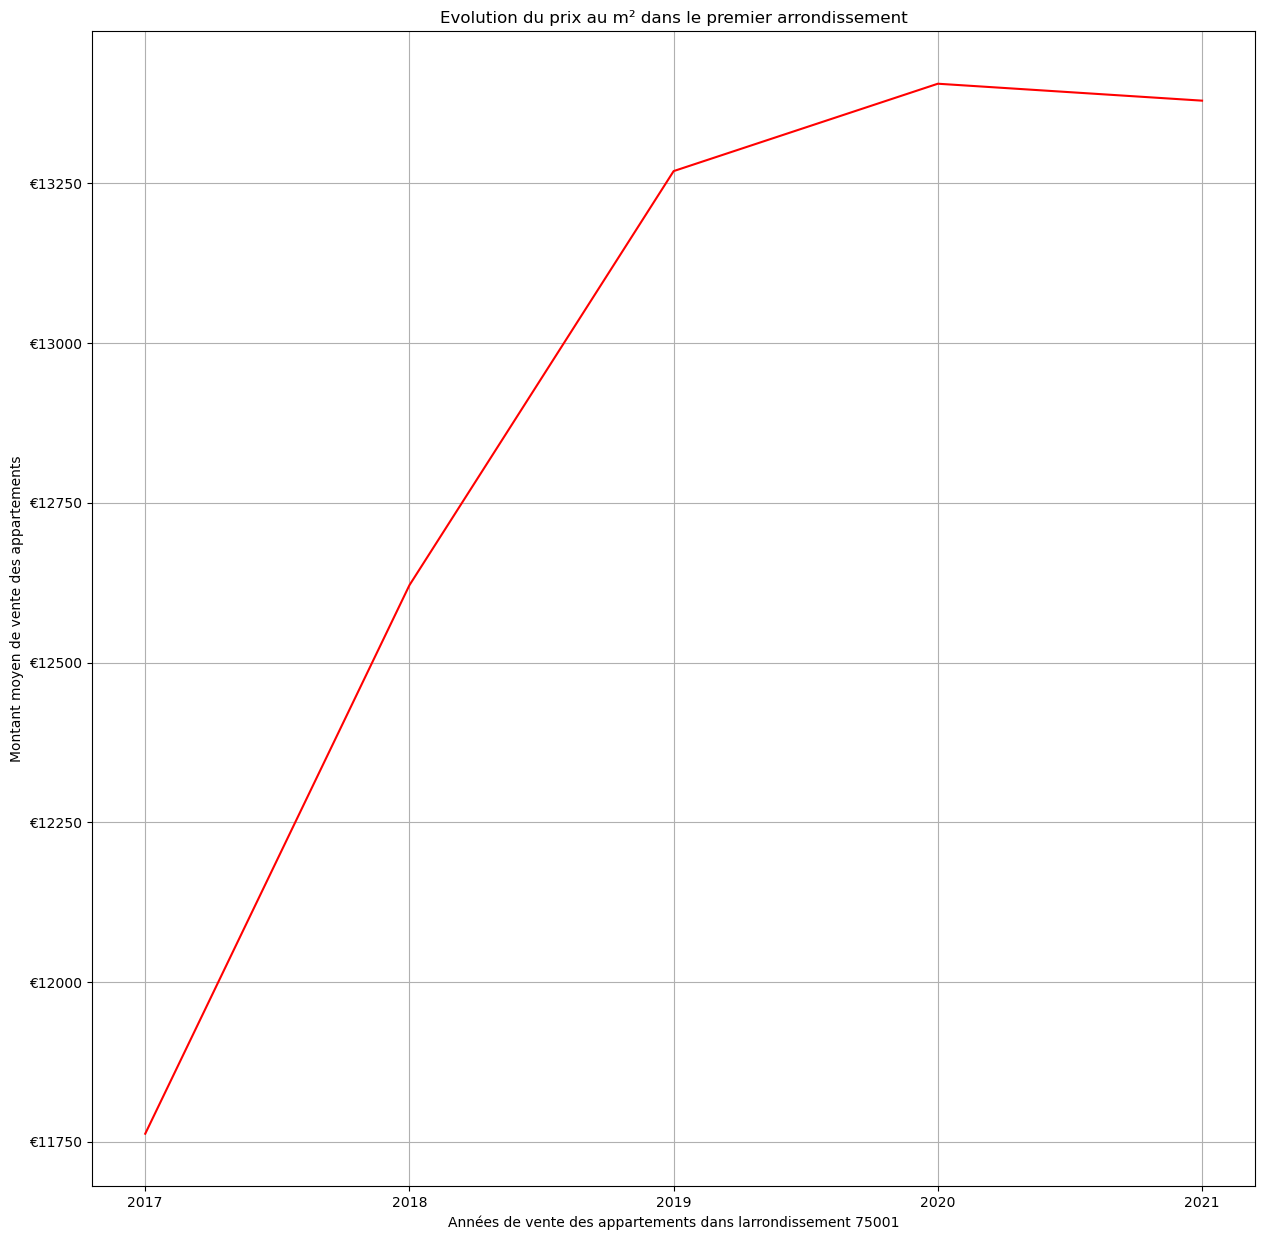

In [15]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
plt.plot(['2017','2018','2019','2020','2021'],arrond.loc[arrond['code_postal']==75001]['prix_metre_carre'],color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

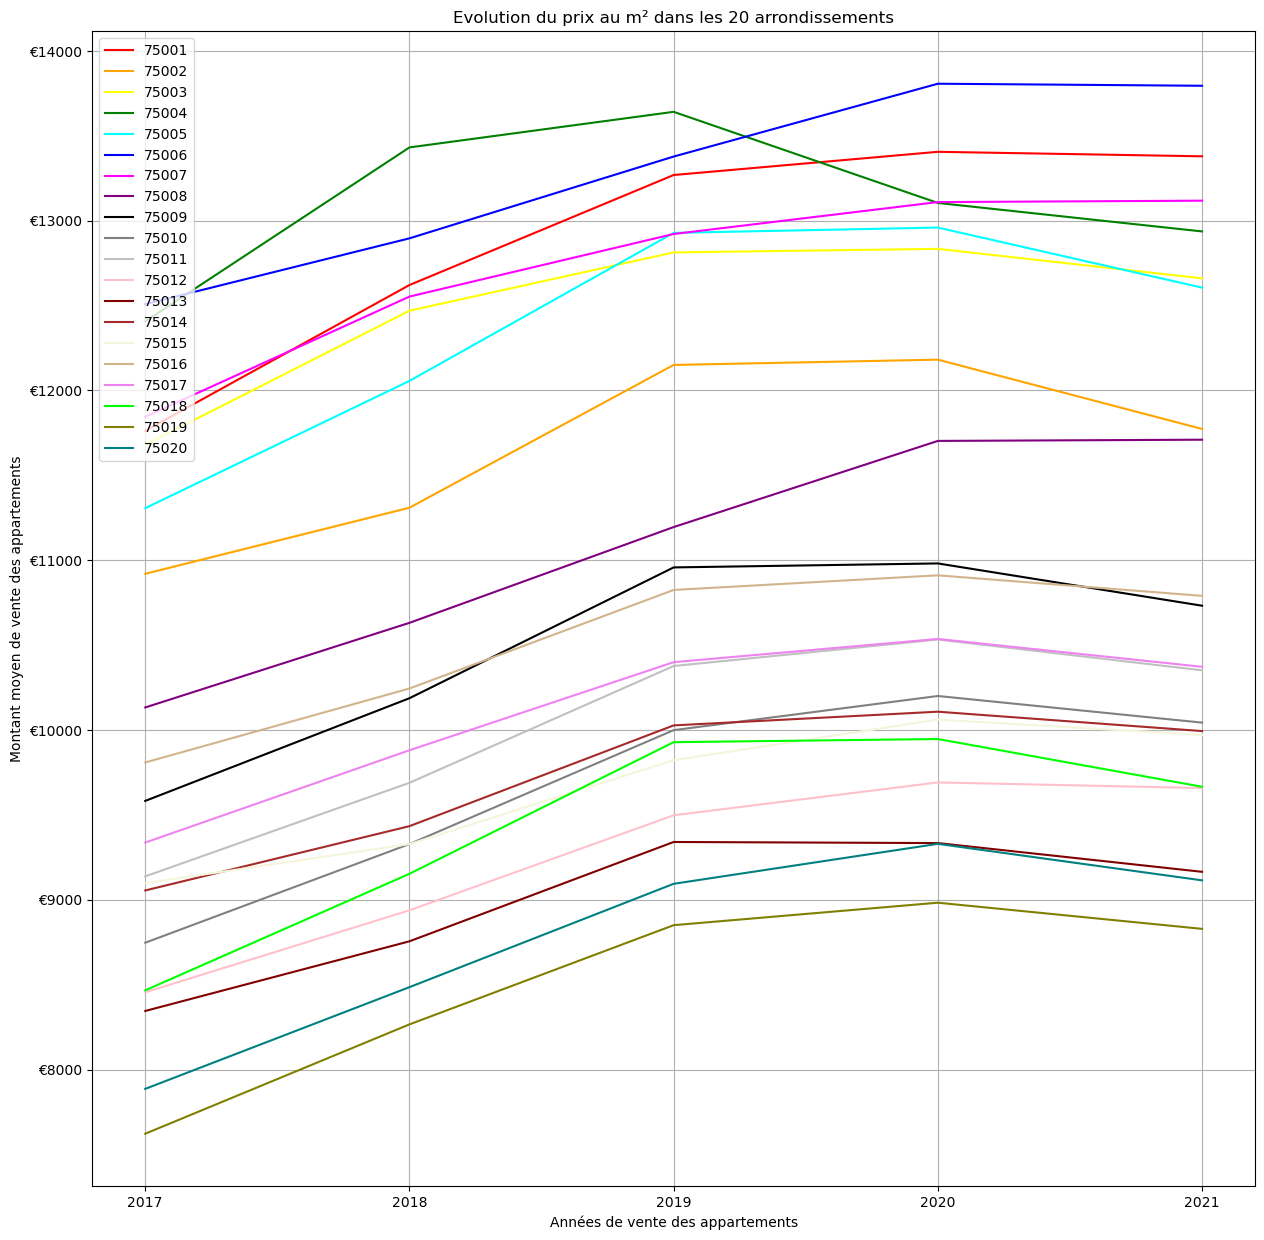

In [16]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
colors = [
    'red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black', 'gray',
    'silver', 'pink', 'maroon', 'brown', 'beige', 'tan', 'violet', 'lime', 'olive', 'teal'
]
for i, code_postal in enumerate(arrond['code_postal'].unique()):
    plt.plot(interval_historique, arrond.loc[arrond['code_postal'] == code_postal, 'prix_metre_carre'], 
             color=colors[i % len(colors)], label=f'{code_postal}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement ce qu'on a pu voir dans notre premier graphique, une tendance générale à la hausse.
Une différence de prix malgré tout entre les arrondissement, beaucoup plus élevé du côté du 1er, 4eme, 6 eme arrondissement contrairement au 19eme, 20eme) Certains arrondissement présentent une croissance plus rapide que d'autres.

### 7. Prix au metre carré par transaction dans un arrondissement

In [17]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
print('le nombre de transactions dans le 6ème est '+str(np.shape(df_histo_appartement.loc[df_histo_appartement['code_postal']==75006])[0]))

le nombre de transactions dans le 6ème est 709


On constate que le nombre de transaction dans le 6ème n'a rien d'anormal

Affichons l'historique des transactions pour visualiser la dispersion des données :

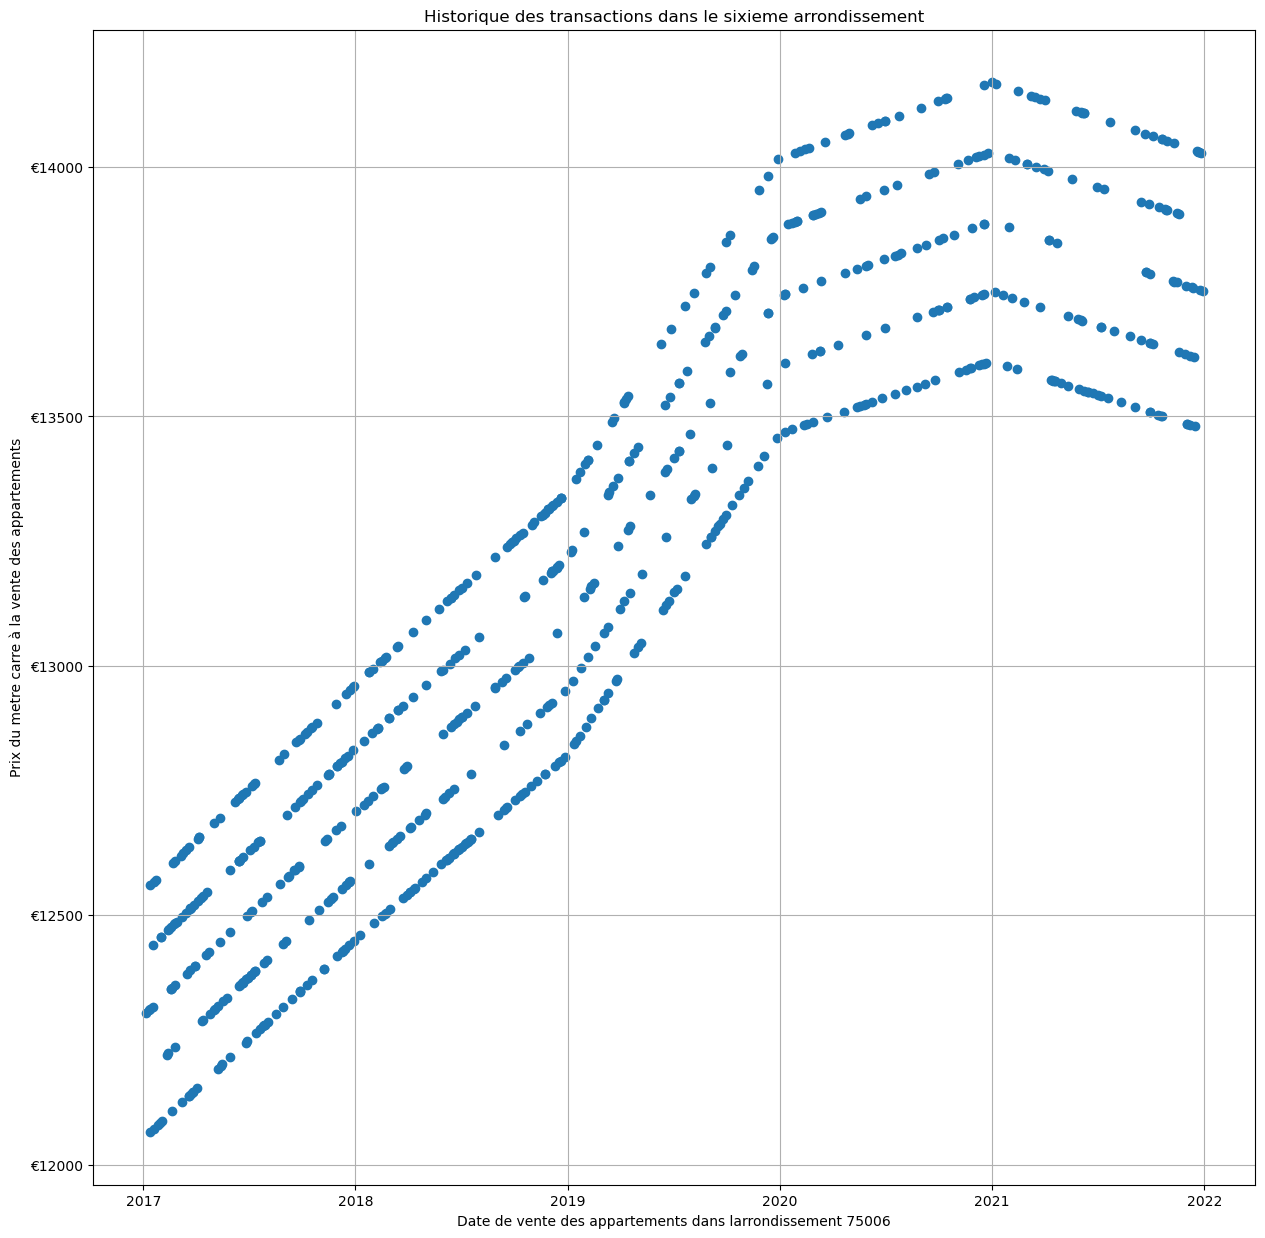

In [18]:
cp=75006
df_cp = df_histo_appartement[df_histo_appartement['code_postal']==cp]
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
plt.scatter(df_cp['date_mutation'], df_cp['prix_metre_carre'])

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
#plt.ylim(0,1)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe une tendance générale à la hausse, une augmentation régulière de 2017 à 2020. Une légère hausse puis une dimunition courant 2021.
Variabilité des prix indiquée par la dispersion des points. Malgré une tendance globale à la hausse, il existe une variation significative.
Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [19]:
#On calcule la corrélation de Spearman
from scipy import stats
from scipy.stats import pearsonr
df_cp['date_mutation_int'] = df_cp['date_mutation'].astype('int64')
corr, p_value = pearsonr(df_cp['date_mutation_int'], df_cp['prix_metre_carre'])
print(f"Coefficient de corrélation de Pearson: {corr}")
print(f"Valeur p: {p_value:.2e}")

Coefficient de corrélation de Pearson: 0.9038446031491487
Valeur p: 7.11e-263


Le coefficient de corrélation est de 0.90 avec une pvalue de 7.11e-263 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [20]:
corr, p_value = pearsonr(df_cp['valeur_fonciere'], df_cp['surface_reelle'])
print(f"Coefficient de corrélation de Pearson: {corr}")
print(f"Valeur p: {p_value}")

Coefficient de corrélation de Pearson: 0.9977572898250283
Valeur p: 0.0


Le coefficient de corrélation est de 0.99 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [21]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_histo_locaux=df_histo.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[df_histo['code_type_local']==4]
df_histo_locaux.head(5)

date_mutation  valeur_fonciere  code_postal  \
18     2017-02-01     3.113277e+06        75003   
29     2017-02-17     1.164375e+06        75003   
34     2017-02-20     3.802522e+05        75003   
91     2017-03-09     3.623842e+05        75001   
109    2017-03-29     3.159072e+05        75003   

                                   type_local  surface_reelle  \
18   Local industriel. commercial ou assimilé             250   
29   Local industriel. commercial ou assimilé              95   
34   Local industriel. commercial ou assimilé              31   
91   Local industriel. commercial ou assimilé              29   
109  Local industriel. commercial ou assimilé              25   

     prix_metre_carre  
18       12453.109192  
29       12256.581685  
34       12266.199603  
91       12496.006027  
109      12636.289027

In [22]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
prix_moyen2=df_histo_locaux[['date_mutation','prix_metre_carre']].groupby(df_histo_locaux.date_mutation.dt.year).mean()
prix_moyen2

prix_metre_carre
date_mutation                  
2017               10949.909217
2018               11569.499180
2019               11960.132050
2020               11966.470204
2021               12006.488691

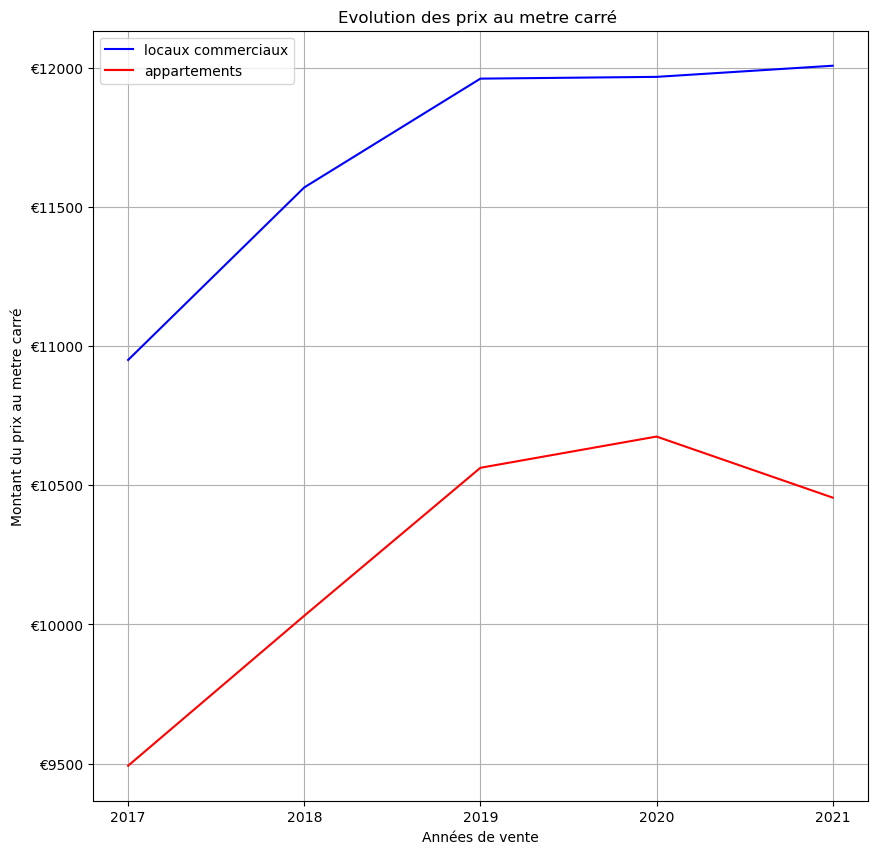

In [23]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],prix_moyen2['prix_metre_carre'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],prix_moyen['prix_metre_carre'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est significativement supérieur au prix au mètre carré des appartements

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [24]:
df_histo_encode=df_histo.join(pd.get_dummies(df_histo['code_postal']))
df_histo_encode=df_histo_encode.join(pd.get_dummies(df_histo['type_local']))
df_histo_encode['timestamp']=df_histo_encode['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_histo_encode.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_metre_carre'],axis='columns',inplace=True)
df_histo_encode.head(5)

valeur_fonciere  surface_reelle  75001  75002  75003  75004  75005  75006  \
0     5.505597e+05              50      0      0      1      0      0      0   
1     1.576492e+06             163      0      0      0      0      0      0   
2     6.577574e+05              66      0      0      0      0      0      0   
3     2.500868e+05              22      0      0      1      0      0      0   
4     1.762667e+05              15      1      0      0      0      0      0   

   75007  75008  ...  75014  75015  75016  75017  75018  75019  75020  \
0      0      0  ...      0      0      0      0      0      0      0   
1      0      1  ...      0      0      0      0      0      0      0   
2      0      1  ...      0      0      0      0      0      0      0   
3      0      0  ...      0      0      0      0      0      0      0   
4      0      0  ...      0      0      0      0      0      0      0   

   Appartement  Local industriel. commercial ou assimilé     timestamp  
0            1                                         0  1.483402e+09  
1            1                                         0  1.484179e+09  
2            1                                         0  1.484006e+09  
3            1                                         0  1.484006e+09  
4            1                                         0  1.484266e+09  

[5 rows x 25 columns]

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [25]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(df_histo_encode[['surface_reelle',75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,'Appartement','Local industriel. commercial ou assimilé','timestamp']],df_histo_encode['valeur_fonciere'],test_size=0.33,random_state=6)

In [26]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [27]:
from sklearn.linear_model import LinearRegression
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
regr_lin=LinearRegression().fit(X_train,y_train)
y_predict_lin=regr_lin.predict(X_test)
(np.mean(abs(y_test-y_predict_lin)/y_test))*100

8.930168284129675

Notre algorithme fait donc 8.9 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- On a pu constater qu'il y a une dispersion dans les données et que notre visualisation nous a montré que l'évolution des prix n'était pas exactement linéaire
- On pourrait envisager d'utiliser d'autres modèles potentiellement plus "pertinent" pour entraîner nos donnés
- On pourrait aussi affiner nos données en étant plus spécifique et élargir l'échantillon. On a utilisé le code postal, on aurait pu viser des rues spécifiques par exemple

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [28]:
#On importe les données dans un dataframe
df_biens = pd.read_excel("biens.xlsx")
df_biens.head(5)

adresse_numero            adresse_nom_voie  code_postal  code_commune  \
0             127             RUE SAINT-DENIS        75001         75101   
1              62  RUE NOTRE-DAME DE NAZARETH        75003         75103   
2              62              RUE DE TURENNE        75003         75103   
3              32                 AV GEORGE V        75008         75108   
4             152                BD HAUSSMANN        75008         75108   

                nom_commune  surface_carrez  code_type_local   type_local  \
0  Paris 1er Arrondissement           16.41                2  Appartement   
1   Paris 3e Arrondissement           20.47                2  Appartement   
2   Paris 3e Arrondissement           64.48                2  Appartement   
3   Paris 8e Arrondissement           63.29                2  Appartement   
4   Paris 8e Arrondissement           20.58                2  Appartement   

   surface_reelle_bati  nombre_pieces_principales  longitude   latitude  
0                   25                          1   2.349593  48.863227  
1                   22                          1   2.356977  48.867907  
2                   65                          3   2.364855  48.859318  
3                   74                          2   2.301586  48.868893  
4                   22                          1   2.311643  48.875490

Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [29]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_biens_encode=df_biens.join(pd.get_dummies(df_biens['code_postal']))
df_biens_encode=df_biens_encode.join(pd.get_dummies(df_biens['type_local']))
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_biens_encode['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())
df_biens_encode.drop(['code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
df_biens_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
df_biens_encode.head(5)

surface_reelle  75001  75002  75003  75004  75005  75006  75007  75008  \
0              25      1      0      0      0      0      0      0      0   
1              22      0      0      1      0      0      0      0      0   
2              65      0      0      1      0      0      0      0      0   
3              74      0      0      0      0      0      0      0      1   
4              22      0      0      0      0      0      0      0      1   

   75009  ...  75014  75015  75016  75017  75018  75019  75020  Appartement  \
0      0  ...      0      0      0      0      0      0      0            1   
1      0  ...      0      0      0      0      0      0      0            1   
2      0  ...      0      0      0      0      0      0      0            1   
3      0  ...      0      0      0      0      0      0      0            1   
4      0  ...      0      0      0      0      0      0      0            1   

   Local industriel. commercial ou assimilé   timestamp  
0                                         0  1672441200  
1                                         0  1672441200  
2                                         0  1672441200  
3                                         0  1672441200  
4                                         0  1672441200  

[5 rows x 24 columns]

In [30]:
#Conversion du dataframe en str
df_biens_encode.columns = df_biens_encode.columns.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [31]:
#On effectue la prédiction
y_predict_final=regr_lin.predict(df_biens_encode)
#On vérifie les 10 premières valeurs
y_predict_final[:10]

array([433566.27719167, 372407.32546222, 820216.92067037, 884291.18355397,
       342753.9986511 , 478138.29487682, 393235.67872772, 640194.50162168,
       149119.80417569, 147766.85964394])

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [32]:
df_biens_prediction=df_biens_encode
df_biens_prediction['valeur_fonciere_prediction']=y_predict_final
df_biens_prediction.head()

surface_reelle  75001  75002  75003  75004  75005  75006  75007  75008  \
0              25      1      0      0      0      0      0      0      0   
1              22      0      0      1      0      0      0      0      0   
2              65      0      0      1      0      0      0      0      0   
3              74      0      0      0      0      0      0      0      1   
4              22      0      0      0      0      0      0      0      1   

   75009  ...  75015  75016  75017  75018  75019  75020  Appartement  \
0      0  ...      0      0      0      0      0      0            1   
1      0  ...      0      0      0      0      0      0            1   
2      0  ...      0      0      0      0      0      0            1   
3      0  ...      0      0      0      0      0      0            1   
4      0  ...      0      0      0      0      0      0            1   

   Local industriel. commercial ou assimilé   timestamp  \
0                                         0  1672441200   
1                                         0  1672441200   
2                                         0  1672441200   
3                                         0  1672441200   
4                                         0  1672441200   

   valeur_fonciere_prediction  
0               433566.277192  
1               372407.325462  
2               820216.920670  
3               884291.183554  
4               342753.998651  

[5 rows x 25 columns]

In [33]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')
df_biens_prediction.loc[df_biens_prediction['Appartement']==1]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment particulier est (en millions deuros):


71.23690558326524

In [34]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')
df_biens_prediction.loc[df_biens_prediction['Local industriel. commercial ou assimilé']==1]['valeur_fonciere_prediction'].sum()/1000000

la valorisation du segment corporate est (en millions deuros):


98.31892840108378

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment corporate aura une valorisation supérieure au segment particulier au 31 Décembre 2022. D'après nos prédictions cet écart sera de 27 millions d'euros.
- A noter que notre estimation via l'intervalle d'apprentissage a montré des résultats à 8.9% d'erreur moyenne, ces 27 millions ne servent pas à servir d'estimation précise. Mais permet de se faire une idée de l'échelle des valeurs.
- Nous avons utilisé des données des donnés de 2017 à 2021. On a donc pu mettre en avant un potentiel impact du COVID dans notre lecture des résultats. Mais toutes les problématiques rencontrées à partir de 2021 ne sont pas pris en compte dans notre régression linéaire.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [35]:
#On importe les données dans un dataframe
df_class=pd.read_excel('echantillon_a_classer2.xlsx')
df_class.head(5)

valeur_fonciere  code_postal               nom_commune  surface_reelle
0    868687.083271        75019  Paris 19e Arrondissement              88
1    452050.762192        75019  Paris 19e Arrondissement              45
2    193088.653587        75019  Paris 19e Arrondissement              21
3    303012.549370        75019  Paris 19e Arrondissement              32
4    149272.200110        75019  Paris 19e Arrondissement              20

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [36]:
df_class_encode=df_class
df_class_encode['prix_metre_carre']=df_class_encode['valeur_fonciere']/df_class_encode['surface_reelle']
df_class_encode.drop(columns=['code_postal','nom_commune','valeur_fonciere','surface_reelle'],inplace=True)
df_class_encode.sort_values('prix_metre_carre')

prix_metre_carre
21       7207.217630
12       7238.422973
35       7239.983240
34       7294.202055
19       7296.900510
25       7306.810274
15       7313.114384
20       7322.570548
14       7343.539315
7        7348.917415
24       7399.266027
16       7415.564351
23       7437.880186
4        7463.610005
10       7490.469041
33       7577.044521
37       7583.980837
29       7613.514621
9        7616.420959
31       7666.071700
2        9194.697790
3        9469.142168
11       9518.076103
28       9597.631488
6        9674.262777
36       9715.531658
30       9734.720495
39       9771.486096
8        9789.051438
22       9815.972258
13       9869.462342
0        9871.444128
17       9949.544452
26       9961.146860
18       9978.784822
5        9982.016919
38       9983.591800
1       10045.572493
27      10103.161577
32      10113.195822

Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [37]:
from sklearn.cluster import KMeans
df_class_predict = KMeans(n_clusters=2, n_init=10, random_state=0).fit_predict(df_class_encode)

In [38]:
# On vérifie les données de la prédiction
df_class_encode['df_class_predict'] = df_class_predict
df_class_encode

prix_metre_carre  df_class_predict
0        9871.444128                 0
1       10045.572493                 0
2        9194.697790                 0
3        9469.142168                 0
4        7463.610005                 1
5        9982.016919                 0
6        9674.262777                 0
7        7348.917415                 1
8        9789.051438                 0
9        7616.420959                 1
10       7490.469041                 1
11       9518.076103                 0
12       7238.422973                 1
13       9869.462342                 0
14       7343.539315                 1
15       7313.114384                 1
16       7415.564351                 1
17       9949.544452                 0
18       9978.784822                 0
19       7296.900510                 1
20       7322.570548                 1
21       7207.217630                 1
22       9815.972258                 0
23       7437.880186                 1
24       7399.266027                 1
25       7306.810274                 1
26       9961.146860                 0
27      10103.161577                 0
28       9597.631488                 0
29       7613.514621                 1
30       9734.720495                 0
31       7666.071700                 1
32      10113.195822                 0
33       7577.044521                 1
34       7294.202055                 1
35       7239.983240                 1
36       9715.531658                 0
37       7583.980837                 1
38       9983.591800                 0
39       9771.486096                 0

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [39]:
#On affiche les résultats
for i in df_class_encode.index:
    if round(df_class_encode.loc[i,'df_class_predict'])==1:
        df_class_encode.loc[i,'label']='Appartement'
    else :
        df_class_encode.loc[i,'label']='Local industriel. commercial ou assimilé'


df_class_encode.drop('df_class_predict', axis =1, inplace=True)
df_class_encode

prix_metre_carre                                     label
0        9871.444128  Local industriel. commercial ou assimilé
1       10045.572493  Local industriel. commercial ou assimilé
2        9194.697790  Local industriel. commercial ou assimilé
3        9469.142168  Local industriel. commercial ou assimilé
4        7463.610005                               Appartement
5        9982.016919  Local industriel. commercial ou assimilé
6        9674.262777  Local industriel. commercial ou assimilé
7        7348.917415                               Appartement
8        9789.051438  Local industriel. commercial ou assimilé
9        7616.420959                               Appartement
10       7490.469041                               Appartement
11       9518.076103  Local industriel. commercial ou assimilé
12       7238.422973                               Appartement
13       9869.462342  Local industriel. commercial ou assimilé
14       7343.539315                               Appartement
15       7313.114384                               Appartement
16       7415.564351                               Appartement
17       9949.544452  Local industriel. commercial ou assimilé
18       9978.784822  Local industriel. commercial ou assimilé
19       7296.900510                               Appartement
20       7322.570548                               Appartement
21       7207.217630                               Appartement
22       9815.972258  Local industriel. commercial ou assimilé
23       7437.880186                               Appartement
24       7399.266027                               Appartement
25       7306.810274                               Appartement
26       9961.146860  Local industriel. commercial ou assimilé
27      10103.161577  Local industriel. commercial ou assimilé
28       9597.631488  Local industriel. commercial ou assimilé
29       7613.514621                               Appartement
30       9734.720495  Local industriel. commercial ou assimilé
31       7666.071700                               Appartement
32      10113.195822  Local industriel. commercial ou assimilé
33       7577.044521                               Appartement
34       7294.202055                               Appartement
35       7239.983240                               Appartement
36       9715.531658  Local industriel. commercial ou assimilé
37       7583.980837                               Appartement
38       9983.591800  Local industriel. commercial ou assimilé
39       9771.486096  Local industriel. commercial ou assimilé

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- La prédiction de la valeur foncière des biens immobiliers montre une tendance générale fiable avec une marge d'erreur acceptable.
- La valorisation plus élevés des locaux par rapport aux appartements est conforme aux observations du marché immobilier de Paris
- La classification des biens par le Kmeans a permis de distinguer les locaux des appartements.
- Pour améliorer la précision des prédictions et des classifications, il peut être bénéfique d'utiliser d'autres modèles et de considérer des variables supplémentaires
- Il serait bénéfique de procéder à une mise à jour régulières des données pour inclure les dernières tendances du marché, les phénomènes mondial futurs qui pourraient avoir un impatch sur le marché immobilier. 
- Cette démarche est cruciale pour maintenir la pertinence et la précision des données et par conséquent, affine nos prédictions.
- Cette analyse a permis de démontrer l'utilité des techniques de machine learning pour l'analyse et la prédiction, tout en mettant en évidence certaines limites et opportunités d'amélioration.